# Unsupervised Learning
## Clustering: 

Grouping of similar data points together to discover possible labels.

### General Clustering Concepts:

Unsupervised learning concept. 

Uses unlabeled data and looks for similarities between groups (clusters) in order ot segment the data into seperate clusters.

Note: we dont know the true correct label for the data.




intuitively plotting X features could reveal distinct groups and thus distance between groups can become an intuitive metric in feature space. (A lot of nuiance to this, multidimensionallity etc etc).

Clustering does not label these for you. will only annotate as 1,2 etc etc

You as a practitioner would have to look at the clustering and best decide how to label clusters.

Once labelled up, data can be used for supervised learning as now everything would have been labelled up. 

MAJOR TRADEOFF - unsupervised method does not show if labels were truly significant or if correct.

For unsupervised models, theres a huge lack of performance metrics which allow us to compare methods for clustering.

### K-Means Clustering Theory:

A sequential clustering algo.

For clustering, each point must satisfy a set of properties:
 1. Each point must belong to a cluster
 2. Each point can only belong to one cluster.
 
Example:
unlabelled data. 2 columns/features. X1 and X2.
 1. Choose K value (number of clusters) : lets say we choose K = 3.
 2. Randomly select K distinct data points (positioning for starting points of clusters)
 3. Assign remaining points to nearest cluster points - uses distance metric.
 4. Calculating centre of cluster points (mean value of each point vector , n feature vector)
 5. Iteration. - iterate through all points again and assign to nearest cluster centre. 


### K-Means Clustering Coding Example:

BANK CLIENTS AND MARKETTING CAMPAIGN





In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("DATA/bank-full.csv")

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<AxesSubplot:xlabel='age', ylabel='Count'>

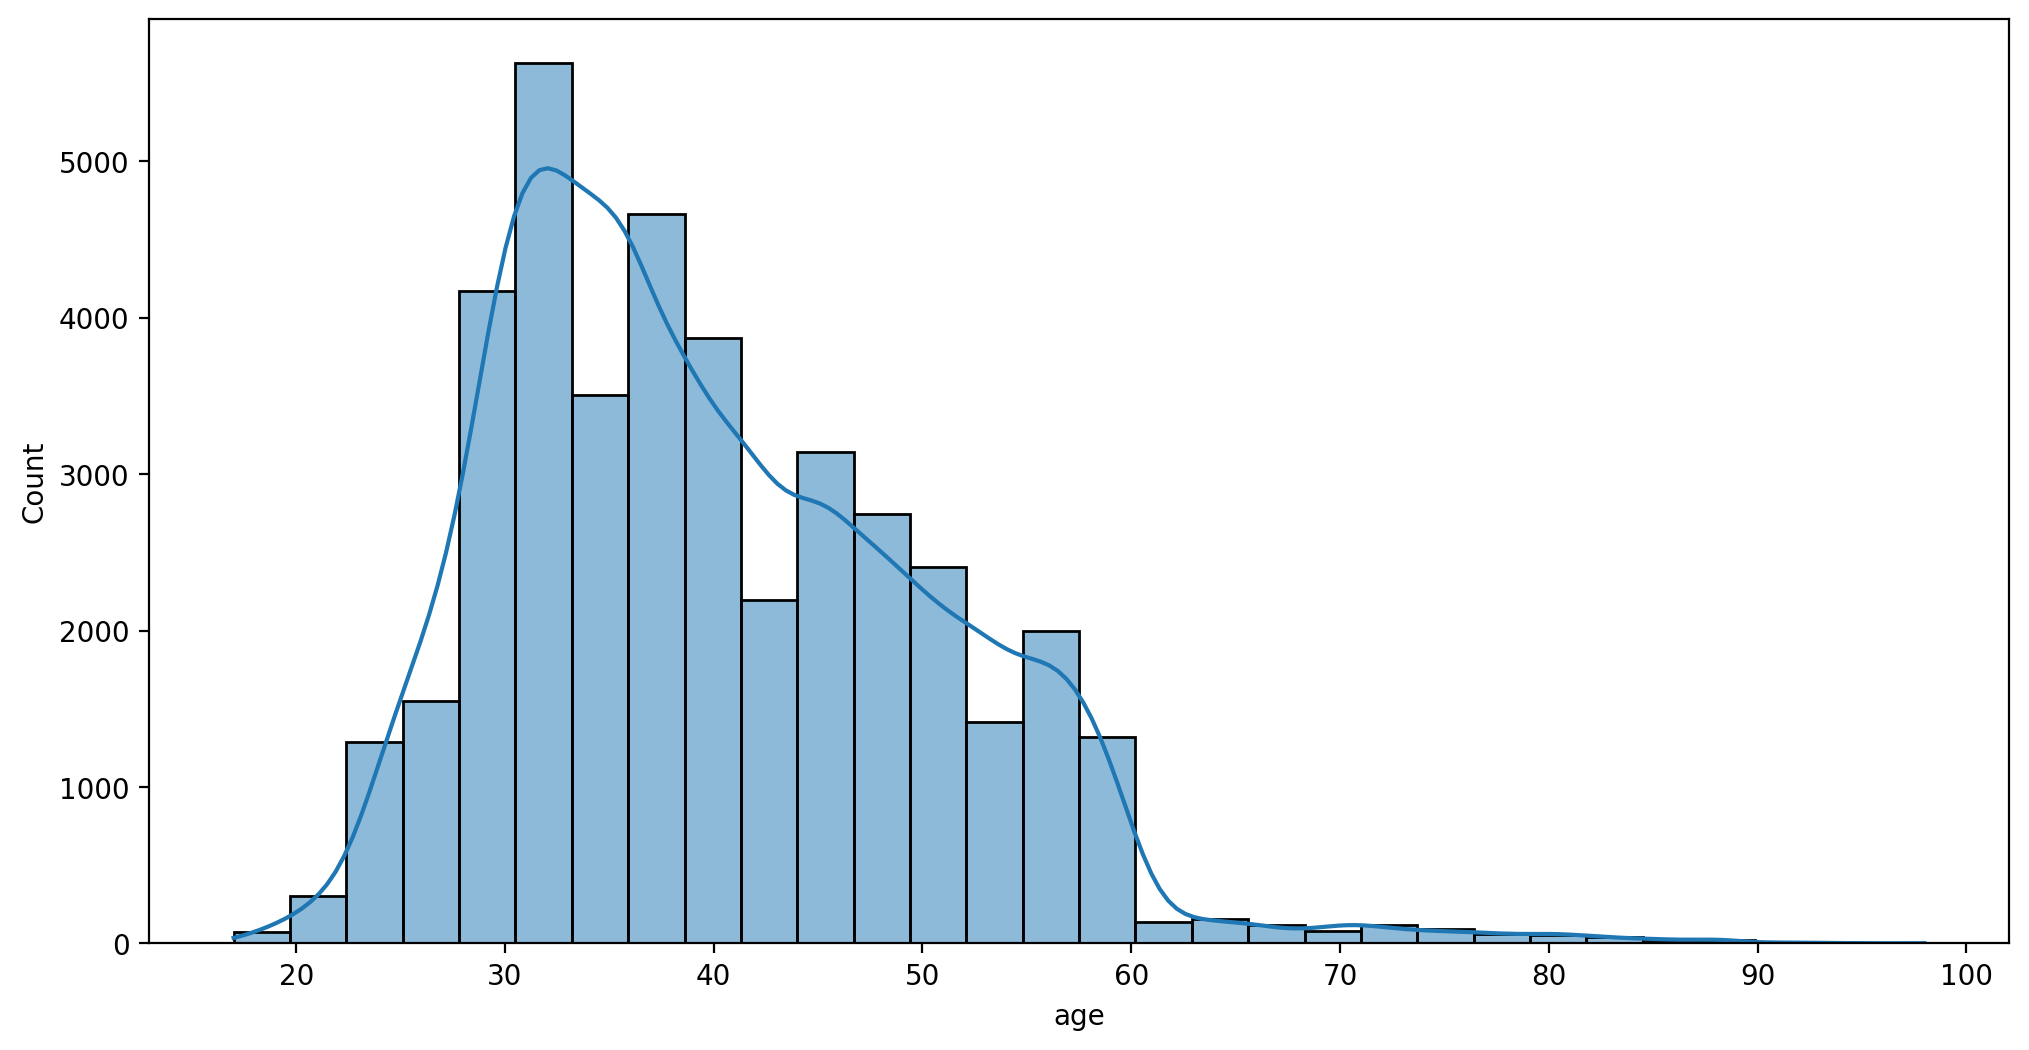

In [24]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',kde='True',bins=30)

<AxesSubplot:xlabel='age', ylabel='Count'>

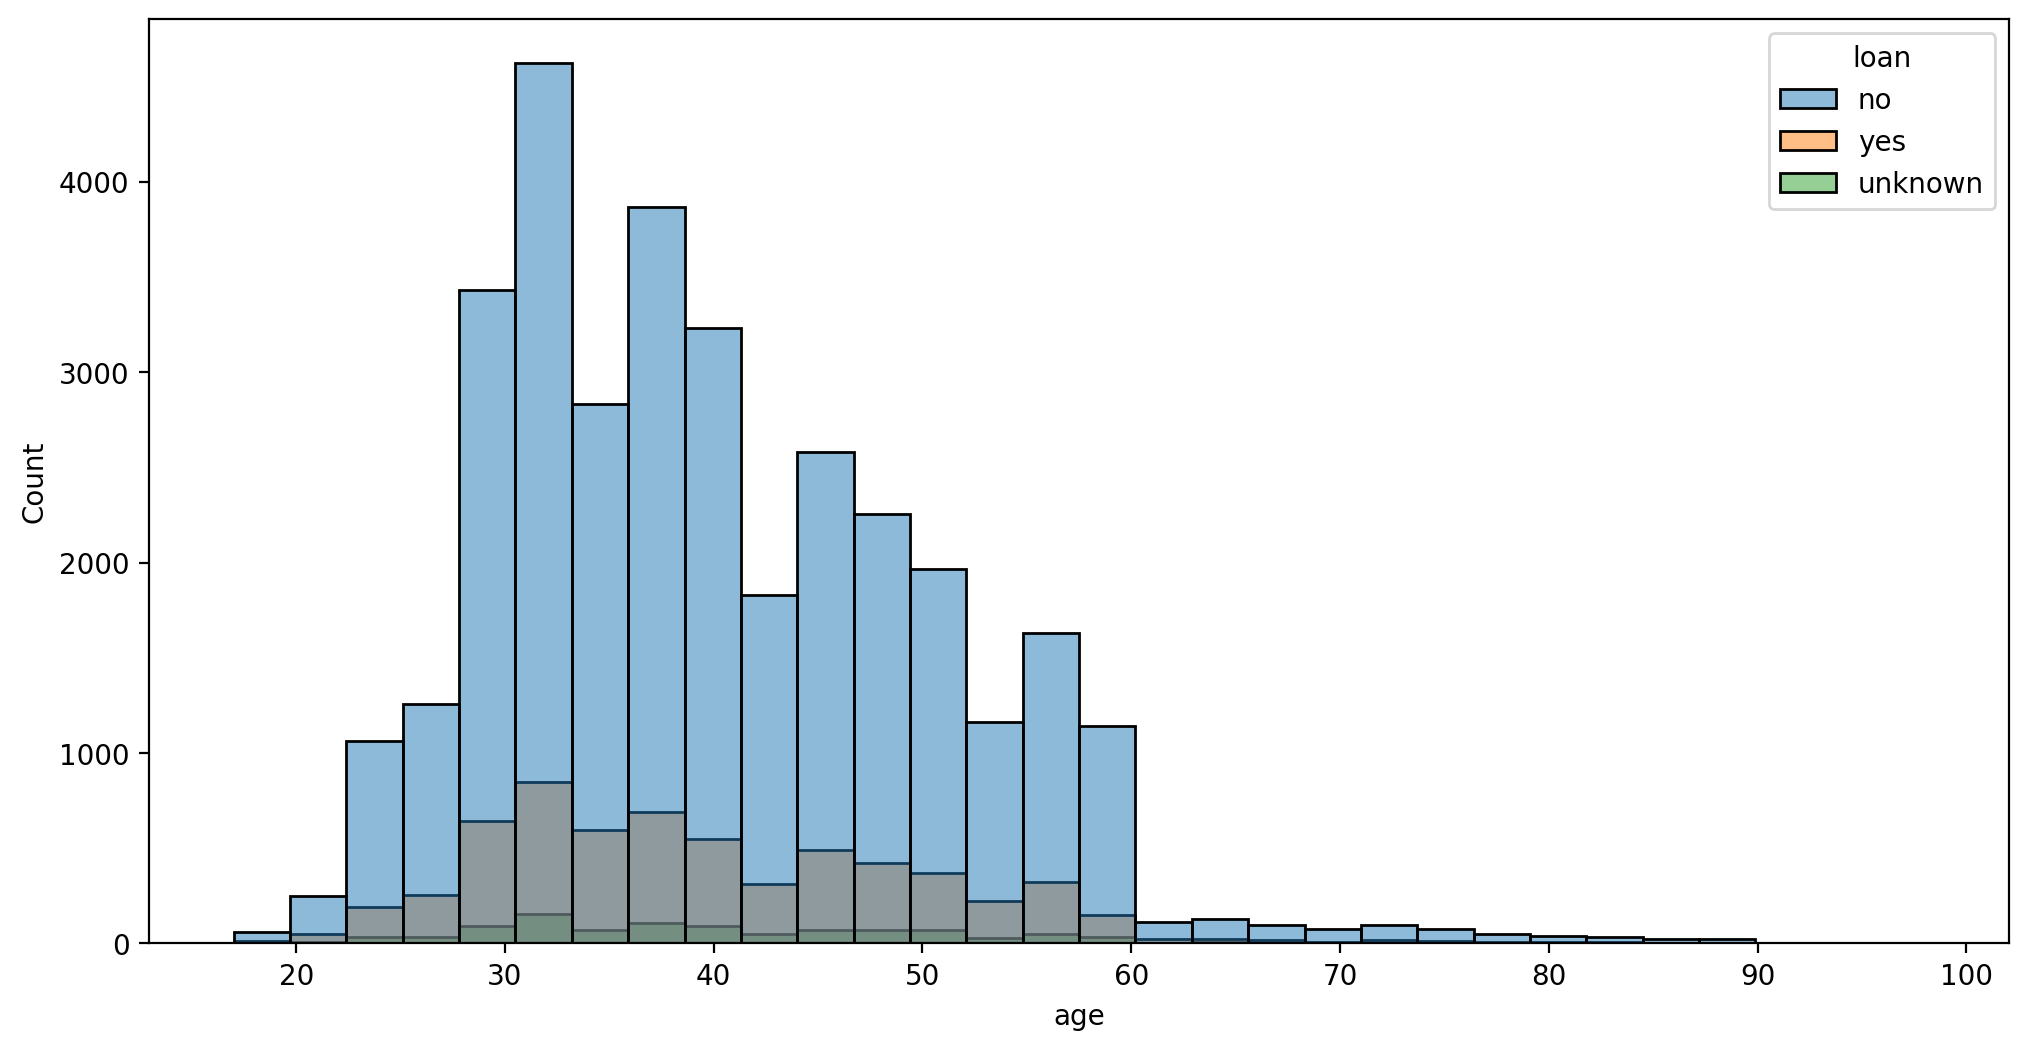

In [26]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',hue='loan',bins=30)

<AxesSubplot:xlabel='pdays', ylabel='Count'>

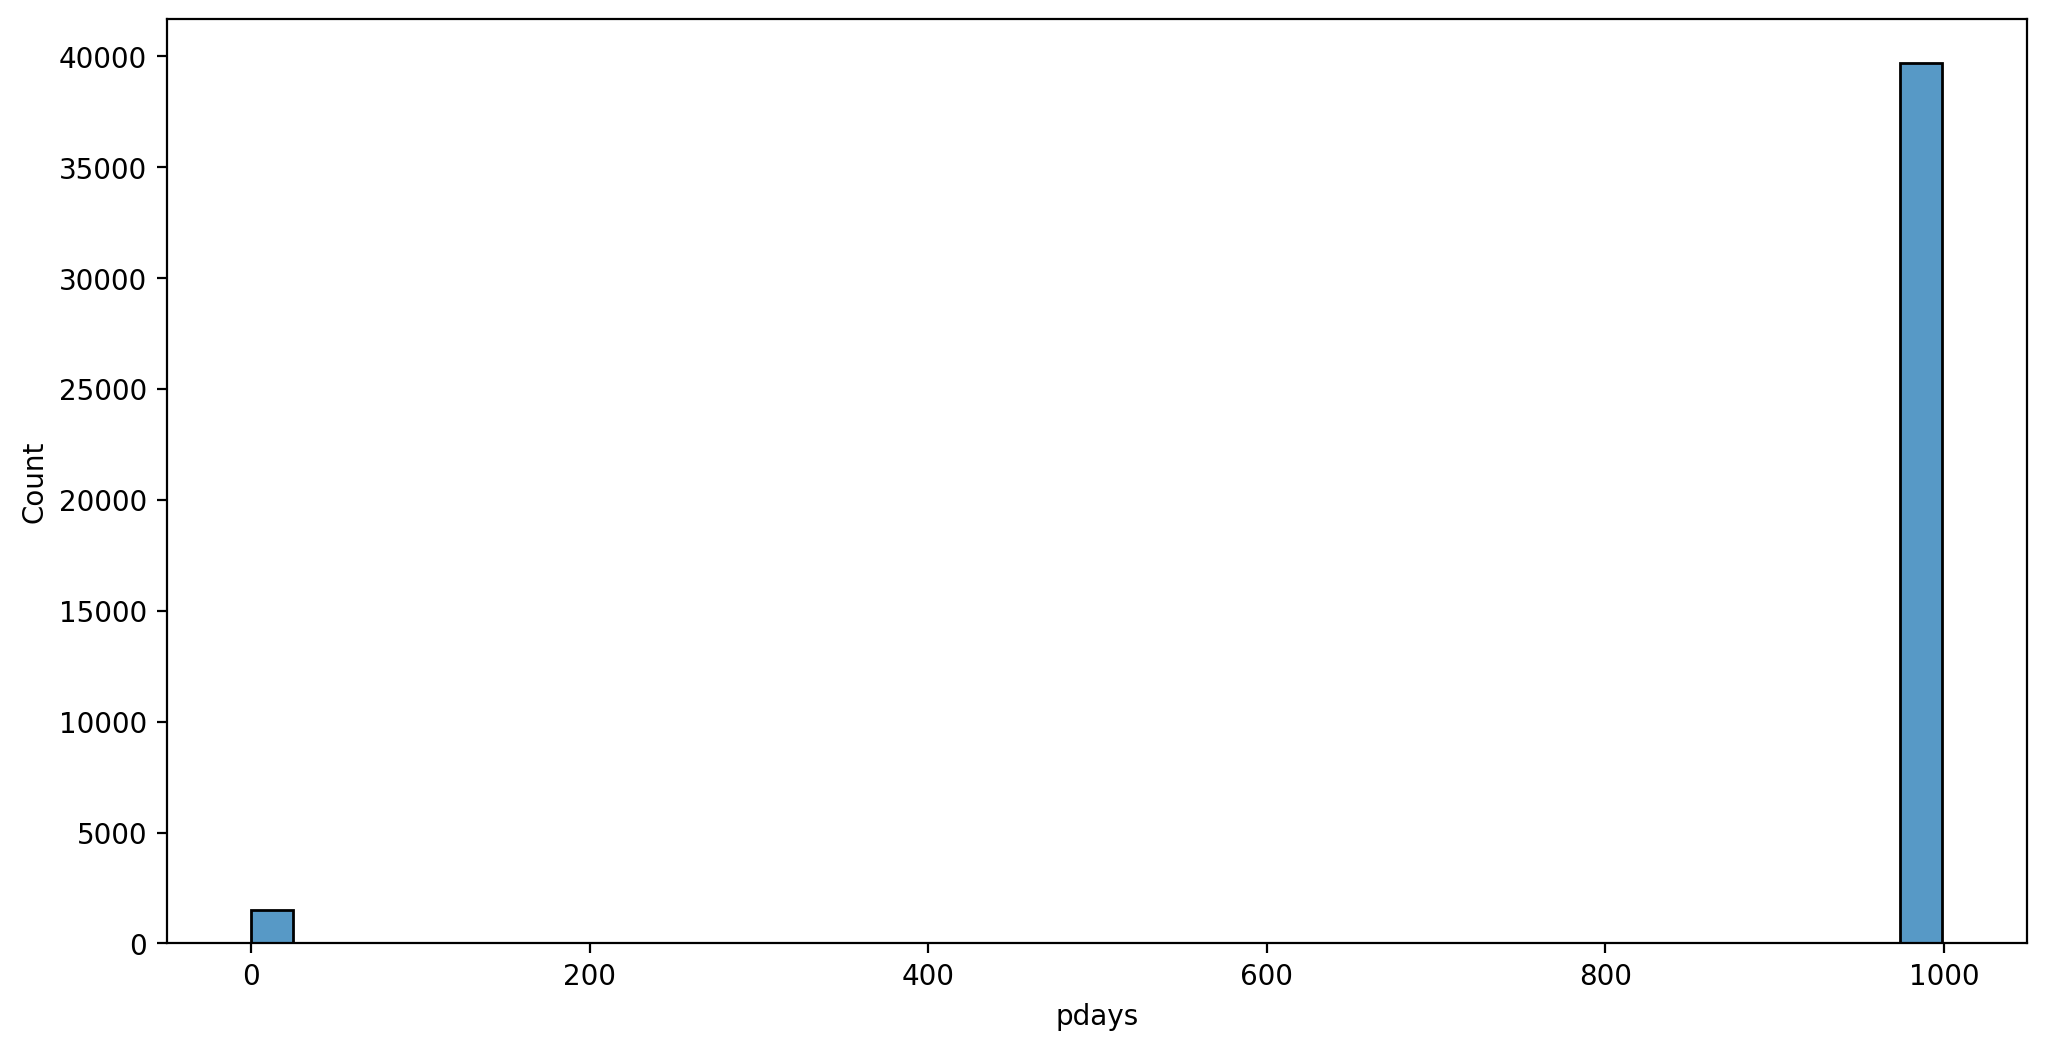

In [27]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays',bins=40) #shows majority people have not been contacted 

<AxesSubplot:xlabel='pdays', ylabel='Count'>

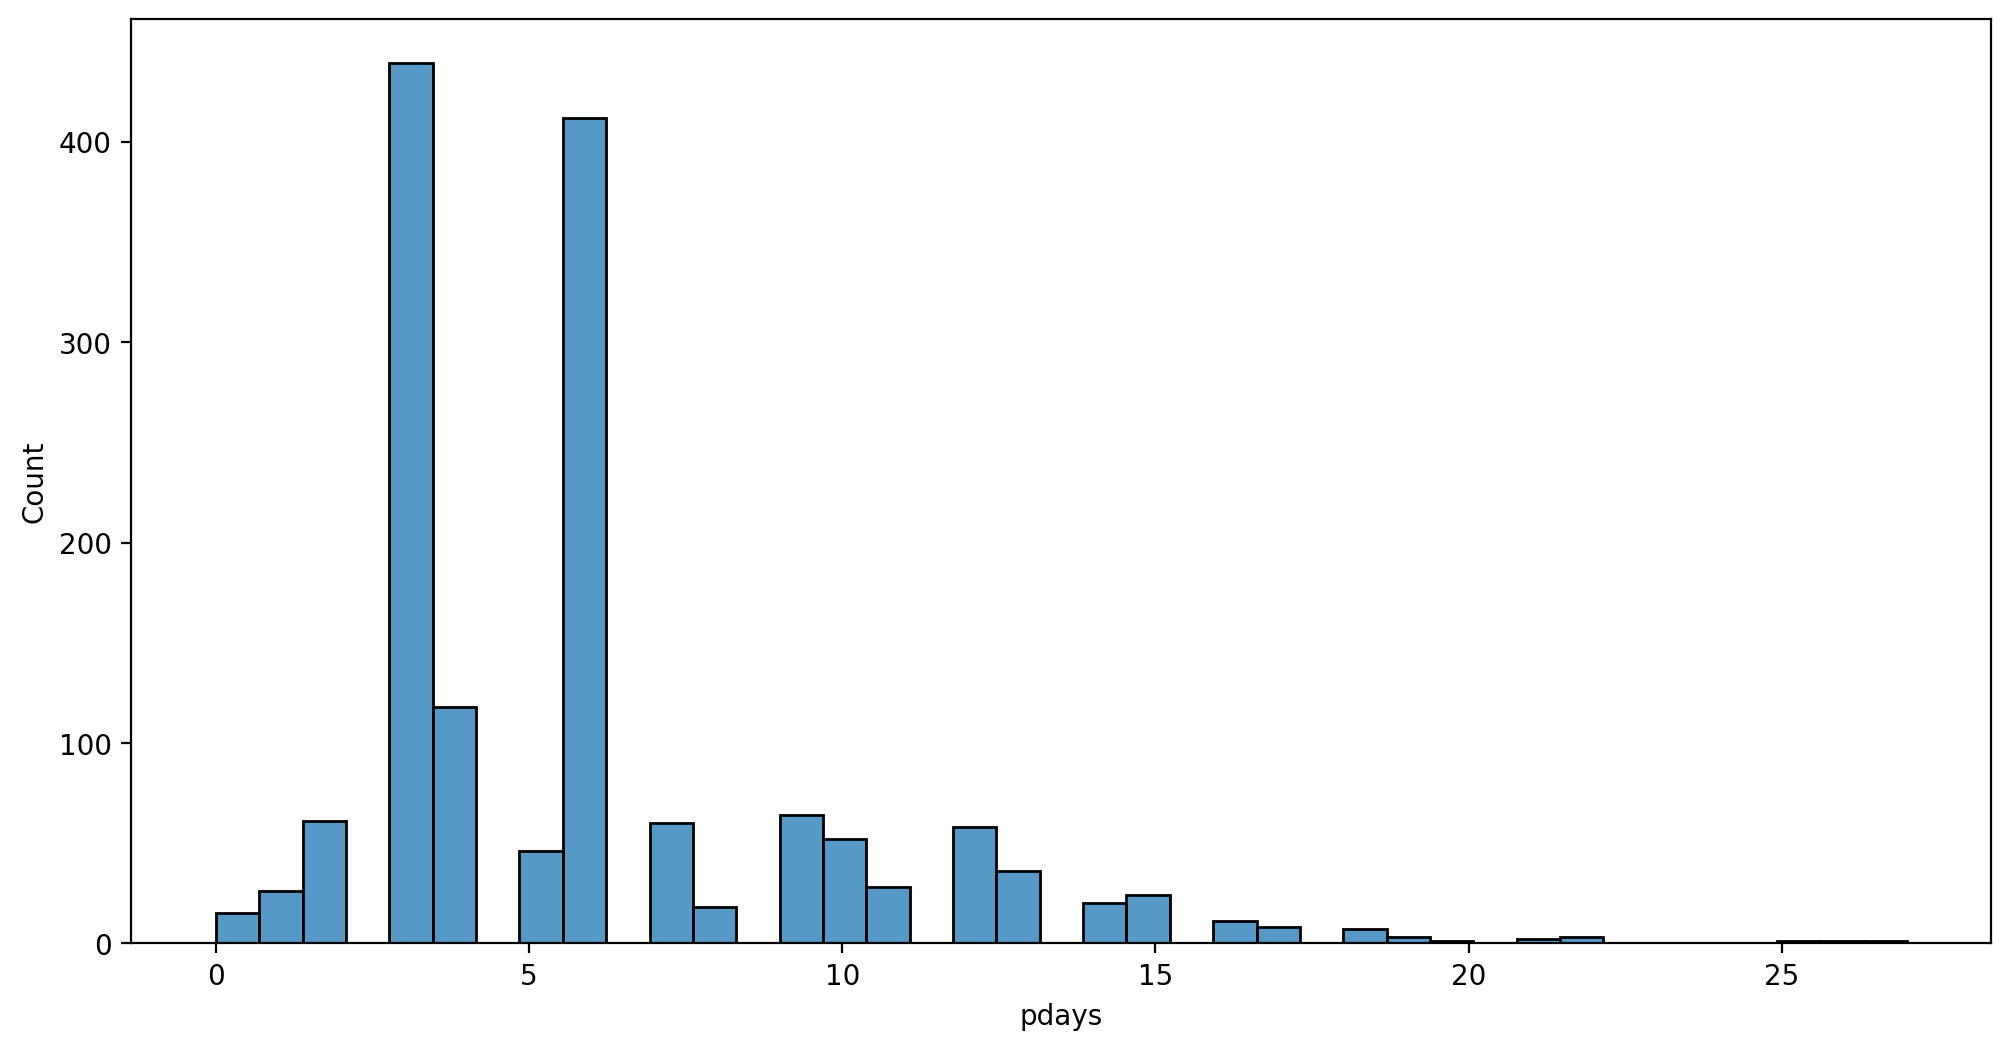

In [29]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays') # have been contacted.

In [30]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [31]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

(0.0, 1000.0)

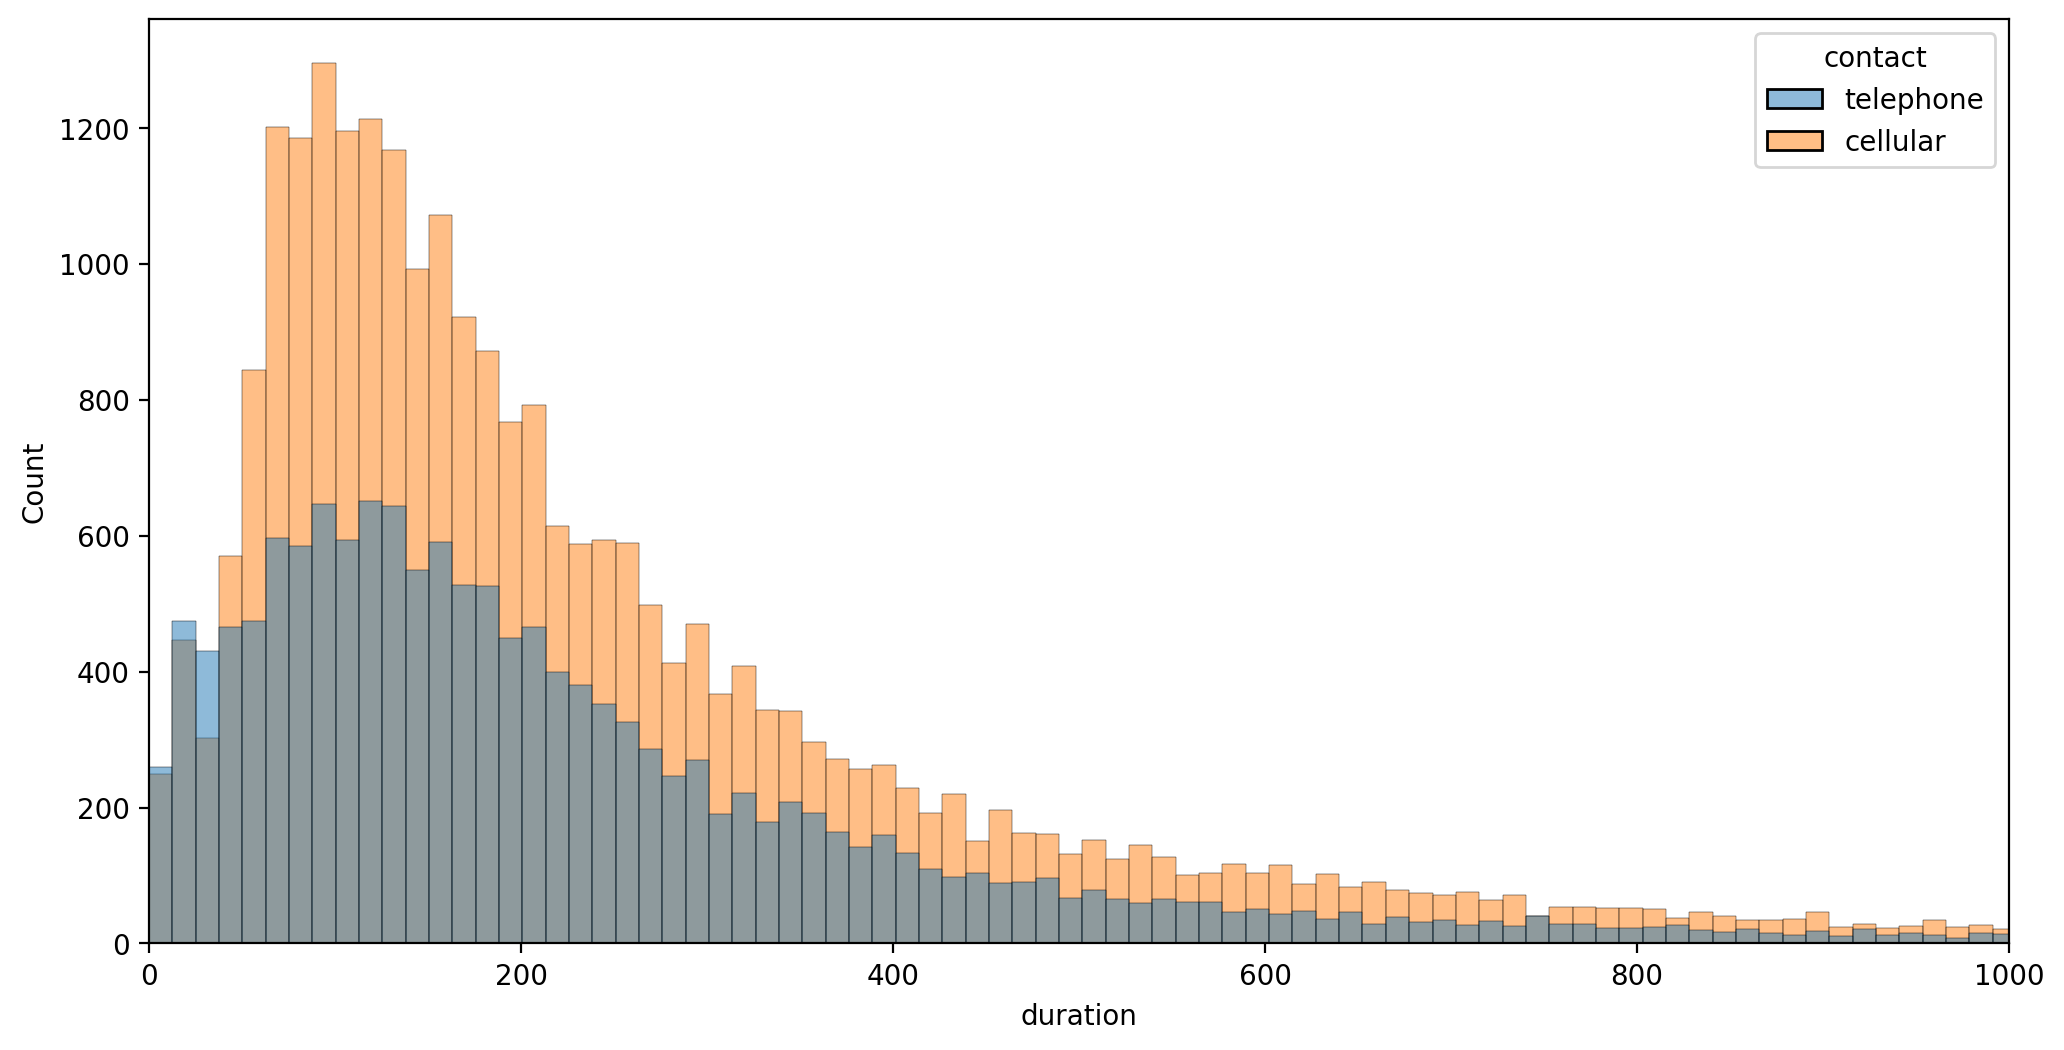

In [36]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0, 1000)

<AxesSubplot:xlabel='contact', ylabel='count'>

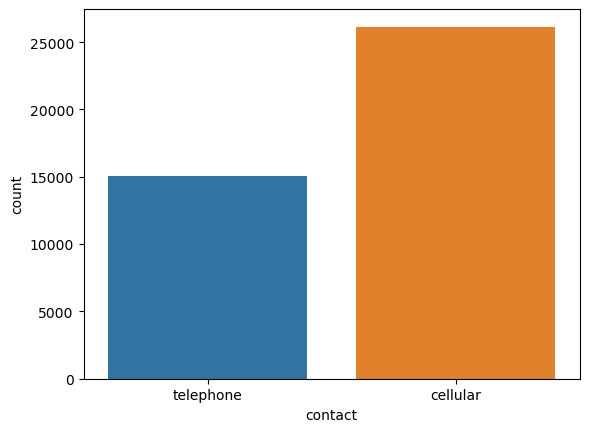

In [37]:
sns.countplot(data=df, x='contact')

In [42]:
orders = df['job'].value_counts().index

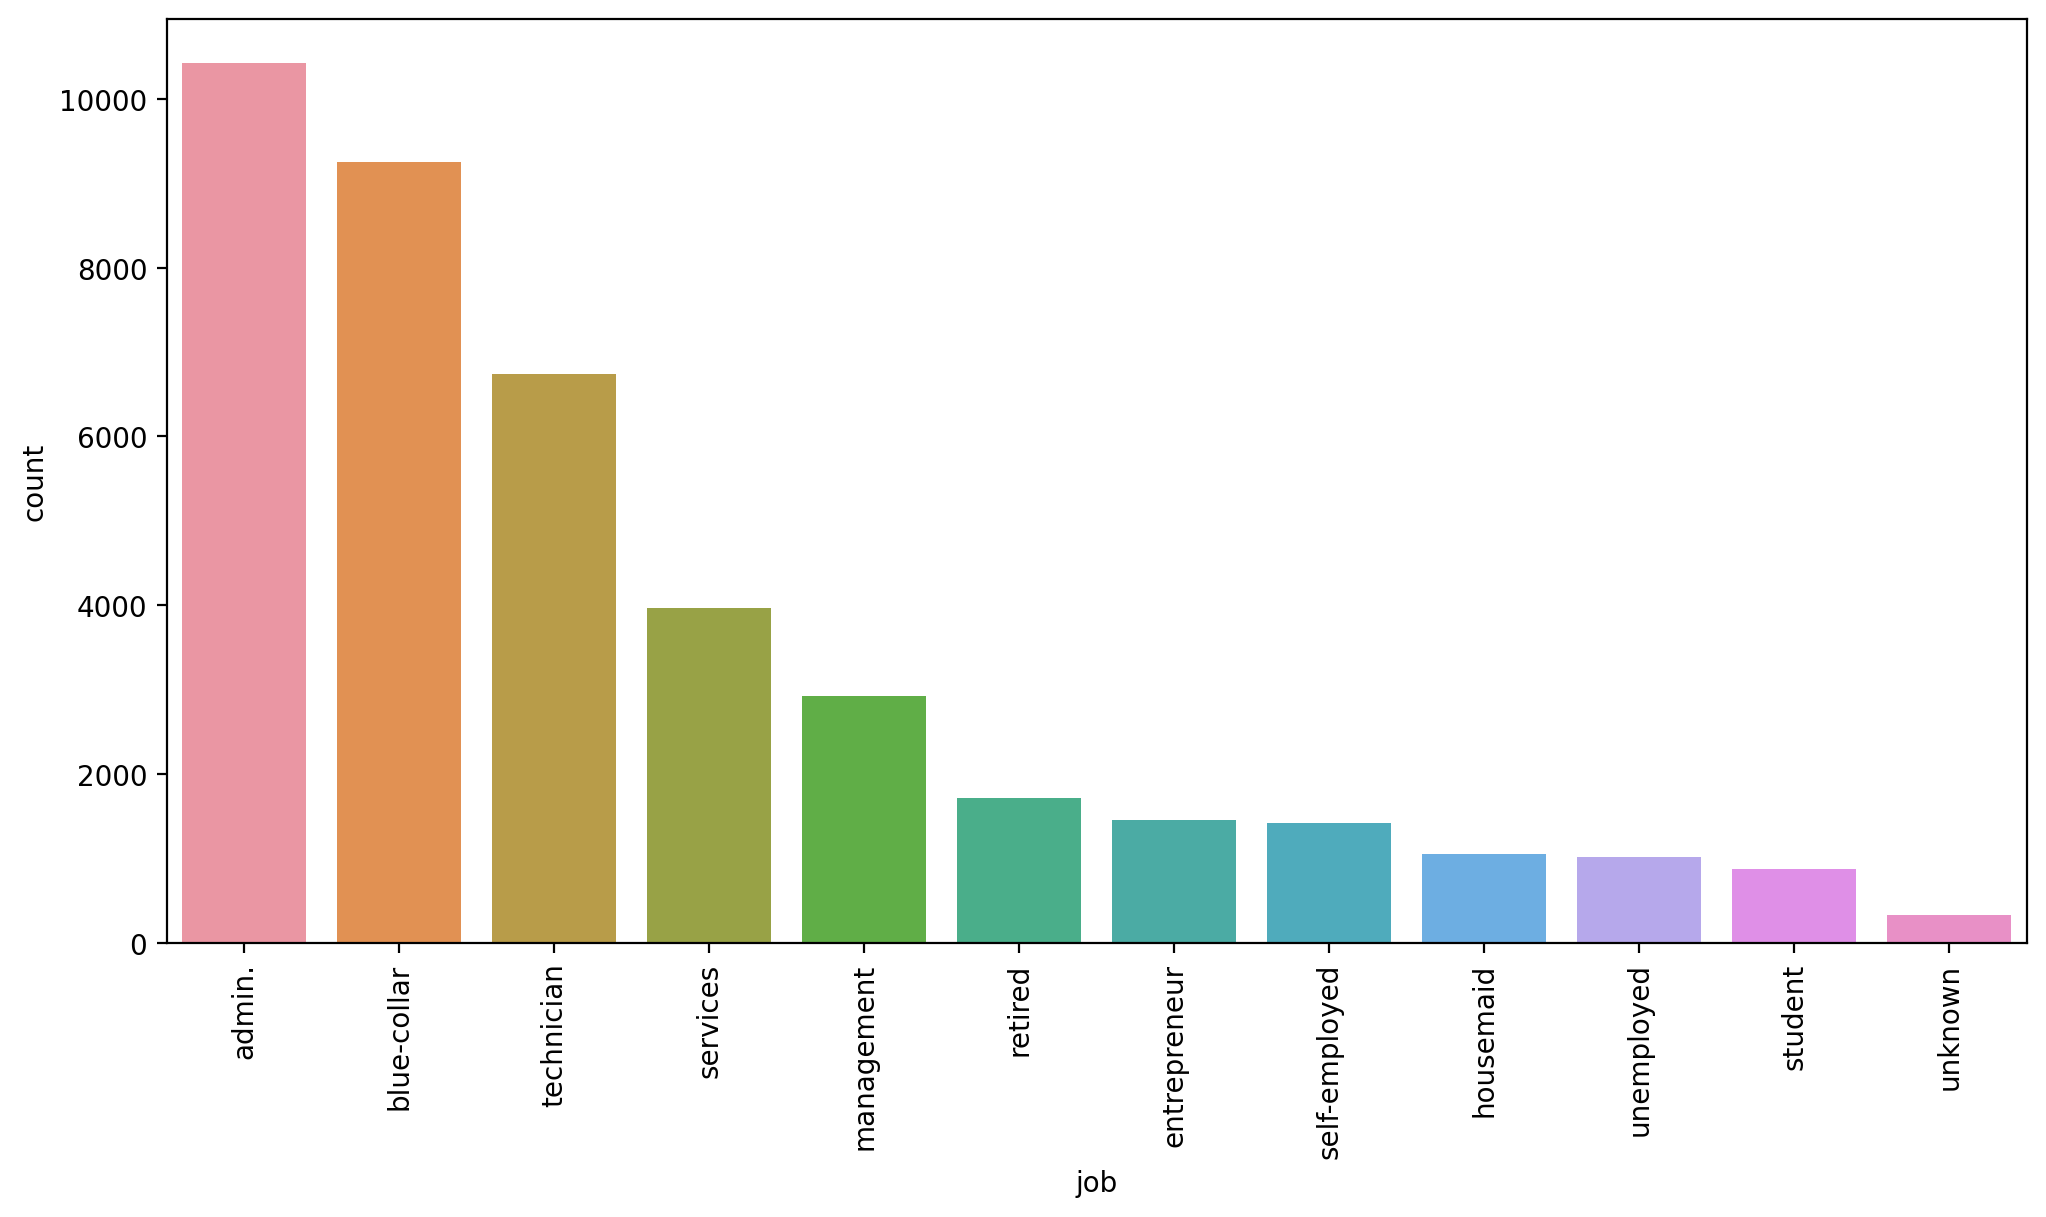

In [43]:
plt.figure(figsize=(12,6),dpi=200)

sns.countplot(data=df,x='job',order=orders)
plt.xticks(rotation=90);

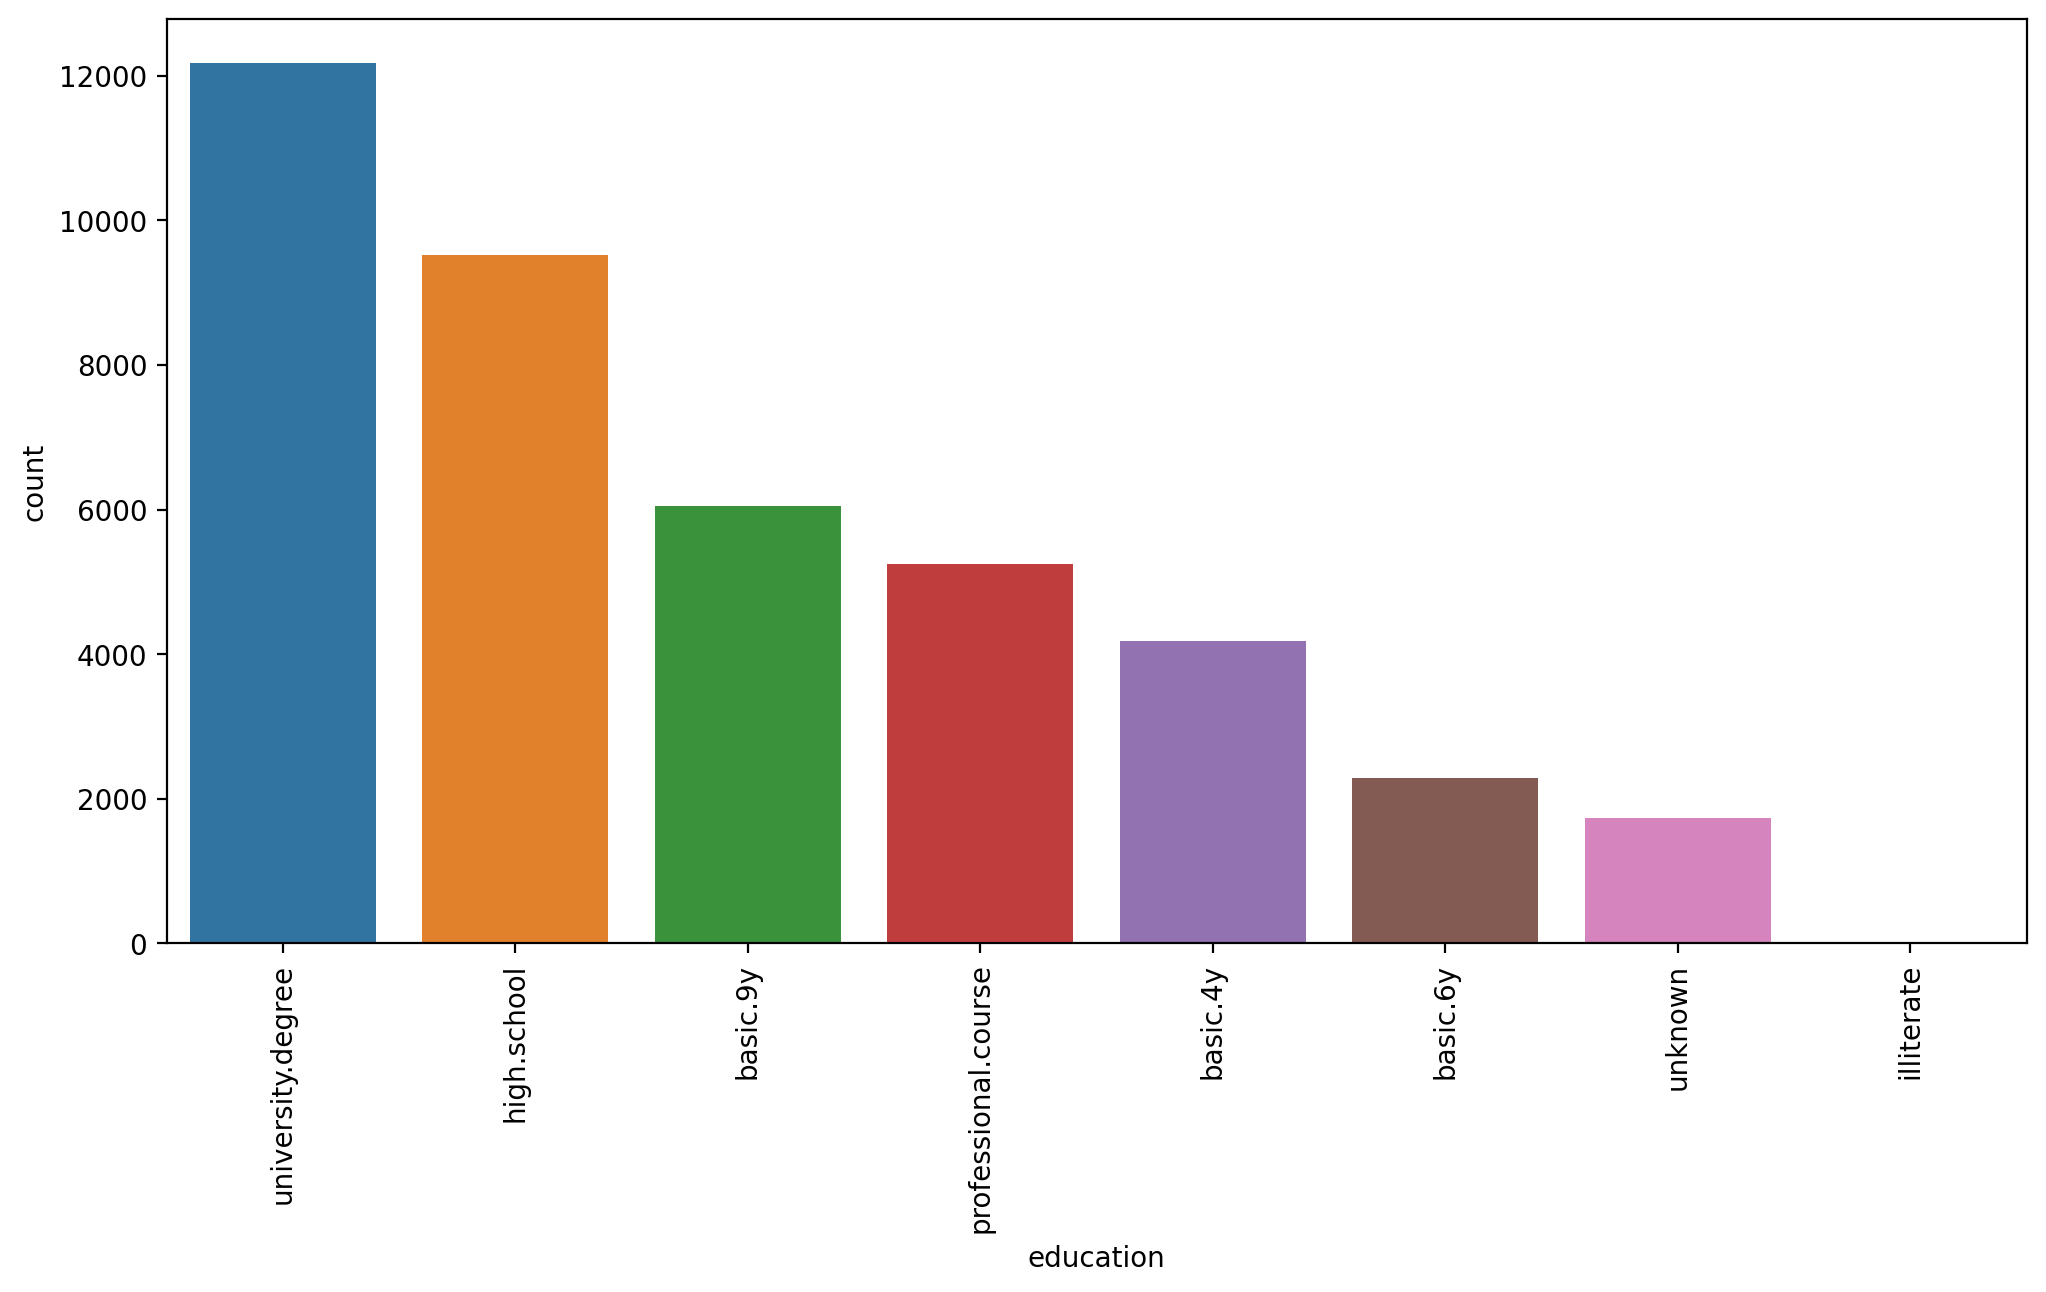

In [44]:
plt.figure(figsize=(12,6),dpi=200)

sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

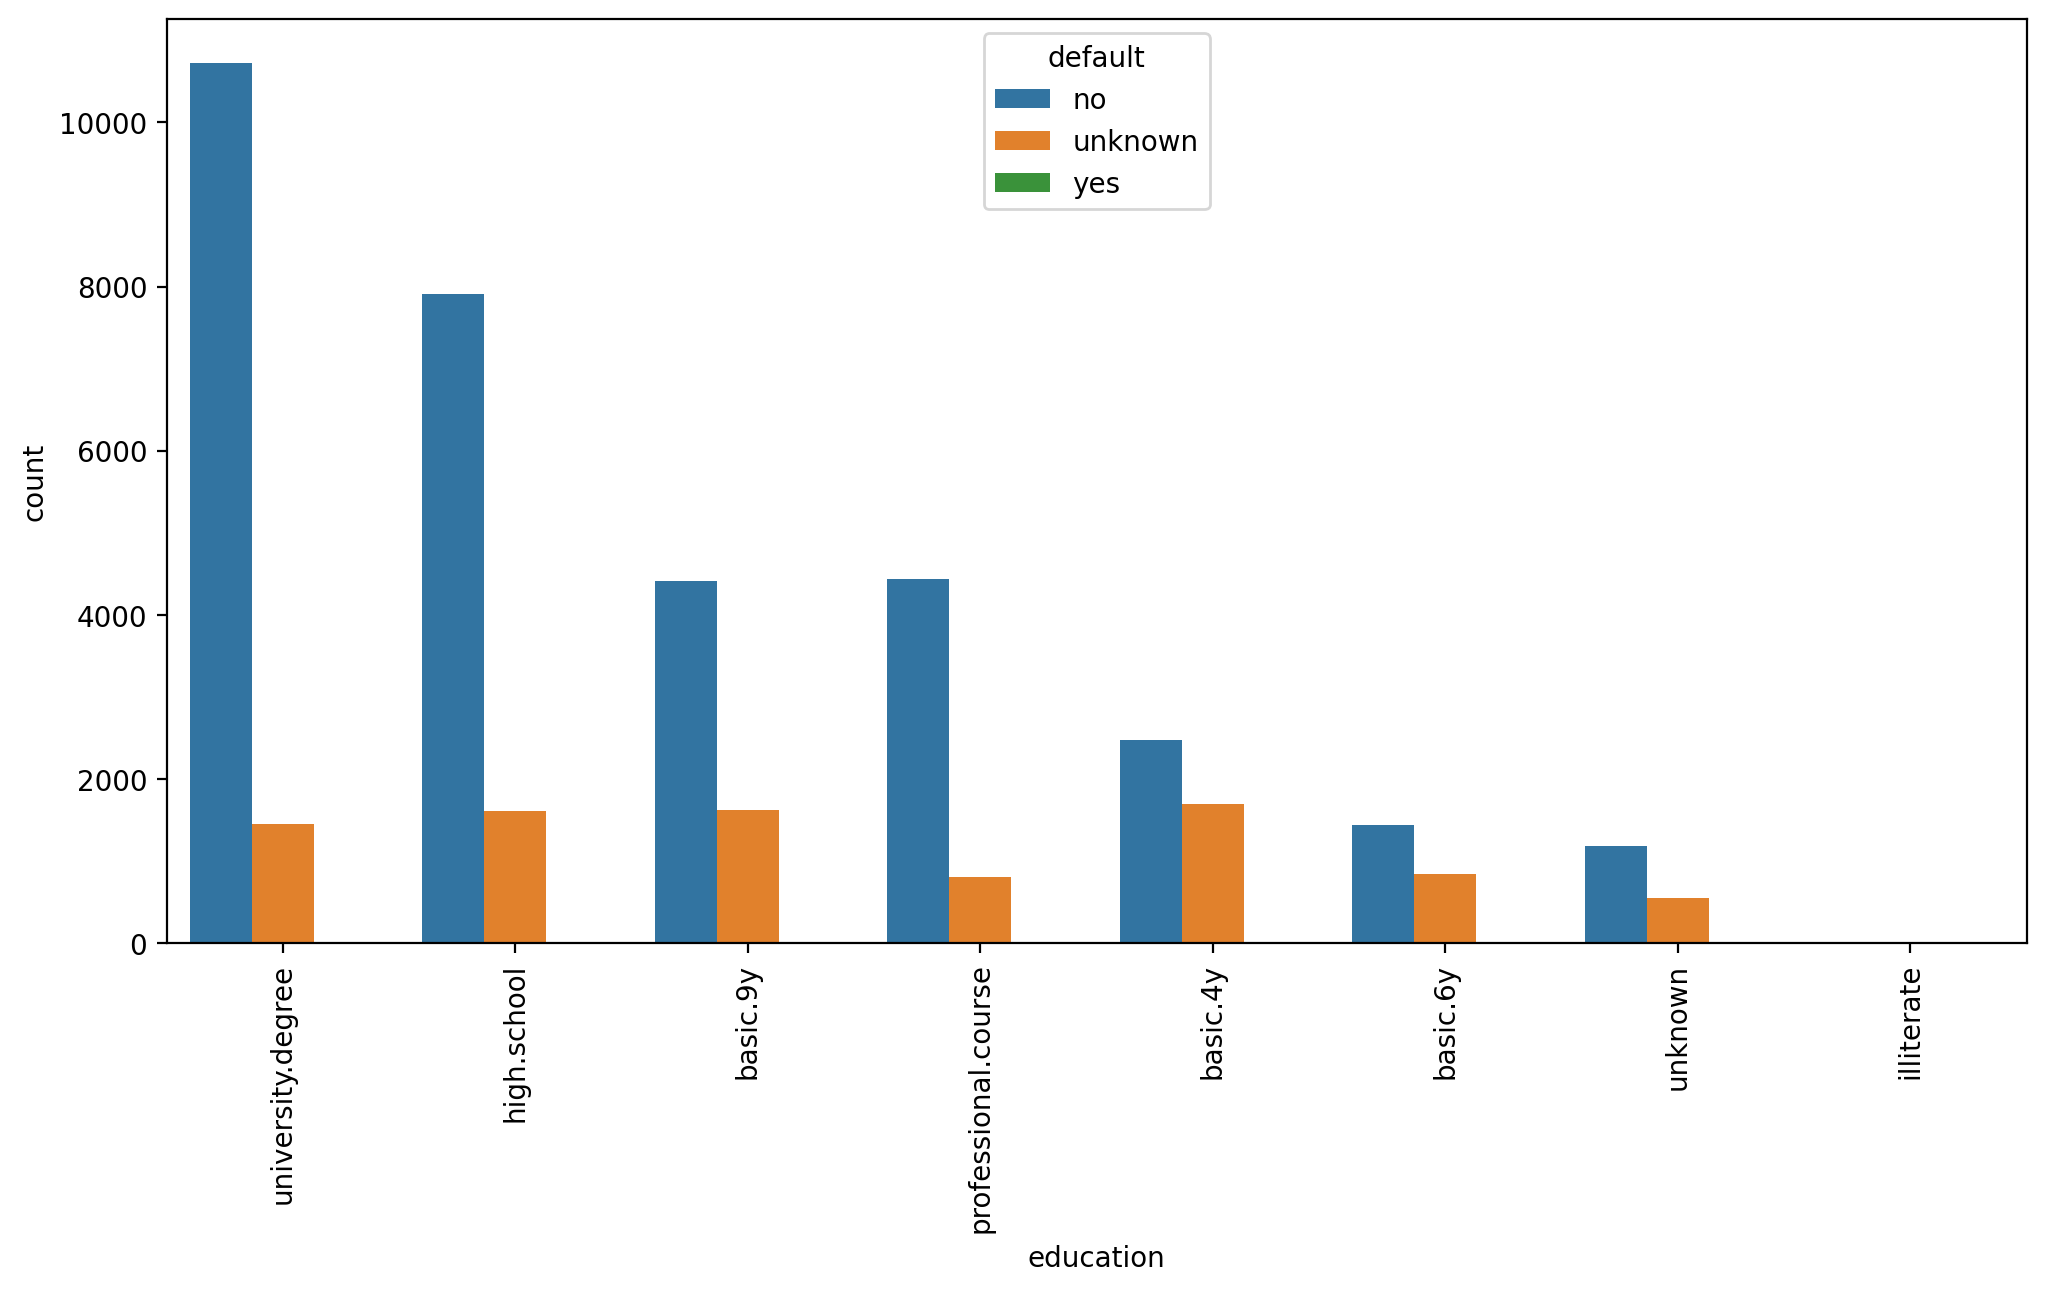

In [46]:
plt.figure(figsize=(12,6),dpi=200)

sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='default', ylabel='count'>

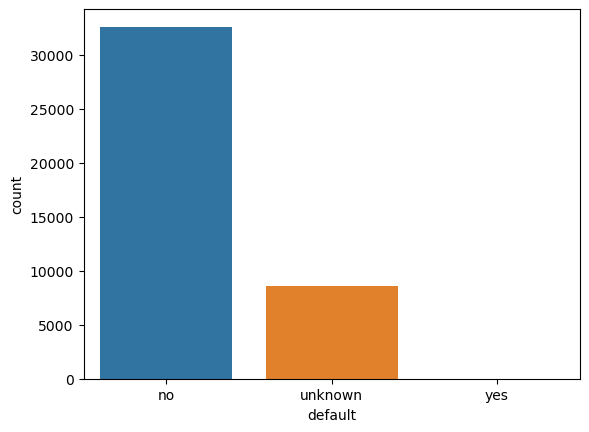

In [47]:
sns.countplot(data=df,x='default')

In [48]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [49]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [51]:
#sns.pairplot(df)